# แบบฝึกหัด 3

---

In [3]:
import numpy as np
import pandas as pd
import statistics

###  

3.1 บริษัทให้บริการด้าน IT ครบวงจรแห่งหนึ่งได้เก็บรวบรวมข้อมูลค่าซ่อมบำรุงอุปกรณ์คอมพิวเตอร์แม่ข่ายและจำนวนลูกค้าของบริษัทในปีที่ผ่านมาเป็นดังไฟล์ ex3_1_itcost.csv  
จงแสดงวิธีหาค่ามัธยฐานและฐานนิยมของค่าซ่อมบำรุงอุปกรณ์คอมพิวเตอร์แม่ข่าย

In [4]:
df_it = pd.read_csv('https://raw.githubusercontent.com/ThammakornS/ProgStat/main/dataset/asm3_1_itcost.csv')
df_it

,maintenance_cost,num_customer
0,<=5000,33
1,5001-10000,41
2,10001-15000,20
3,15001-20000,17
4,20001-25000,10
5,25001-30000,16
6,>=30001,5


In [5]:
#your code
new_ar = df_it.maintenance_cost.to_numpy()
for i in range(len(new_ar)):
    if (">=" in new_ar[i]):
        new_ar[i] = new_ar[i].replace(f"{new_ar[i]}", f"{new_ar[i].split('>=')[1]}-{int(new_ar[i-1].split('-')[1])+5000}")
    elif ("<=" in new_ar[i]):
        new_ar[i] = new_ar[i].replace('<=', '1-')

df_it.maintenance_cost = new_ar
df_it

,maintenance_cost,num_customer
0,1-5000,33
1,5001-10000,41
2,10001-15000,20
3,15001-20000,17
4,20001-25000,10
5,25001-30000,16
6,30001-35000,5


In [6]:
df_it[['cost_from','cost_to']] = df_it.maintenance_cost.str.split("-",expand=True).astype(int)
df_it

,maintenance_cost,num_customer,cost_from,cost_to
0,1-5000,33,1,5000
1,5001-10000,41,5001,10000
2,10001-15000,20,10001,15000
3,15001-20000,17,15001,20000
4,20001-25000,10,20001,25000
5,25001-30000,16,25001,30000
6,30001-35000,5,30001,35000


In [7]:
df_it['num_customer_count'] = df_it.num_customer.cumsum()
df_it

,maintenance_cost,num_customer,cost_from,cost_to,num_customer_count
0,1-5000,33,1,5000,33
1,5001-10000,41,5001,10000,74
2,10001-15000,20,10001,15000,94
3,15001-20000,17,15001,20000,111
4,20001-25000,10,20001,25000,121
5,25001-30000,16,25001,30000,137
6,30001-35000,5,30001,35000,142


In [8]:
median_pos = df_it.num_customer.sum() / 2 # หาตำแหน่ง median df_it.num_customer_count[len(df_it)-1] / 2
e = 0
for  i in  df_it.index:
    if df_it.num_customer_count[i] >= median_pos:
        e = i
        break

# mode
mode_e = np.argmax(df_it.num_customer)
print(f"Mode e: {mode_e}")
print(f"Median position: {median_pos} e: {e}")


Mode e: 1
Median position: 71.0 e: 1


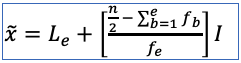

In [11]:
# ขอบล่าง
lower = df_it.cost_from[e] - 0.5
mode_lower = df_it.cost_from[mode_e] - 0.5

i = 5000
print(f"{lower} {median_pos} {df_it.num_customer_count[e-1]} {df_it.num_customer[e]}")
#result
median_value = lower + ((median_pos - df_it.num_customer_count[e-1]) / df_it.num_customer[e]) * 5000

# mode
d1, d2 = np.abs(df_it.num_customer[mode_e] - df_it.num_customer[mode_e-1]), np.abs(df_it.num_customer[mode_e] - df_it.num_customer[mode_e+1])

mode_value = mode_lower + i * ( d1 / (d1 + d2) )

print(f"Median: {median_value}")
print(f"Mode: {mode_value}")

5000.5 71.0 33 41
Median: 9634.646341463415
Mode: 6379.810344827586


###   

3.2 สุ่มตัวอย่างนักศึกษามาจำนวนหนึ่ง พบว่าคะแนนสอบวิชาสถิติ เป็นดังตาราง 'ex3_2_score.csv' จงหาค่า

**3.2.1 ค่าเฉลี่ย**
# 

In [12]:
df_score = pd.read_csv('https://raw.githubusercontent.com/ThammakornS/ProgStat/main/dataset/asm3_2_score.csv')
df_score.head()

,score,num_student
0,11-15,15
1,16-20,14
2,21-25,20
3,26-30,18
4,31-35,16


In [10]:
#your code
# 1. หา ขอบล่าง และ ขอบบน
df_score[['score_from','score_to']] = df_score.score.str.split("-",expand=True).astype(int)
df_score

,score,num_student,score_from,score_to
0,11-15,15,11,15
1,16-20,14,16,20
2,21-25,20,21,25
3,26-30,18,26,30
4,31-35,16,31,35
5,36-40,17,36,40


In [11]:
min_x = (df_score.score_from[0] + df_score.score_to[0]) /2
max_x = (df_score.score_from[len(df_score)-1] + df_score.score_to[len(df_score)-1]) /2
# ค่ากึ่งกลาง
df_score['ค่ากึ่งกลาง (x)'] = np.arange(min_x, max_x+1, df_score.score_from[1] - df_score.score_from[0])

df_score['ค่า fx'] = df_score['ค่ากึ่งกลาง (x)'] * df_score['num_student']

df_score

,score,num_student,score_from,score_to,ค่ากึ่งกลาง (x),ค่า fx
0,11-15,15,11,15,13.0,195.0
1,16-20,14,16,20,18.0,252.0
2,21-25,20,21,25,23.0,460.0
3,26-30,18,26,30,28.0,504.0
4,31-35,16,31,35,33.0,528.0
5,36-40,17,36,40,38.0,646.0


In [12]:
#result
mean = df_score['ค่า fx'].sum() / df_score['num_student'].sum()
mean

25.85

**3.2.2 ค่ามัธยฐาน**
# 

In [13]:
df_score['num_student_count'] = df_score.num_student.cumsum()
df_score

,score,num_student,score_from,score_to,ค่ากึ่งกลาง (x),ค่า fx,num_student_count
0,11-15,15,11,15,13.0,195.0,15
1,16-20,14,16,20,18.0,252.0,29
2,21-25,20,21,25,23.0,460.0,49
3,26-30,18,26,30,28.0,504.0,67
4,31-35,16,31,35,33.0,528.0,83
5,36-40,17,36,40,38.0,646.0,100


In [14]:
# 1. หาตำแหน่ง median
median_pos = df_score.num_student.sum() / 2
print(f"Median position: {median_pos}")
# 2. หาชั้นที่อยู่ตำแหน่ง median
e = 2
# 3. ความถี่สะสมก่อนหน้าชั้น e
sum_f_e = df_score.num_student_count[e-1]
print(f"ความถี่สะสมก่อนหน้าชั้น e (Sum(fl)): {sum_f_e}")
# 4. ความถี่ของชั้น e
f_e = df_score.num_student[e]
print(f"ความถี่ของชั้น e: {f_e}")
# 5.ขอบล่างของชั้น e
lower =( df_score.score_from[e] + df_score.score_to[e-1]) / 2
print(f"ขอบล่างของชั้น e: {lower}")
# 6. I คือความกว้างของชั้น
I = df_score.score_to[e] - df_score.score_to[e-1]
print(f"I: {I}")
#result
mean = lower + I * ((median_pos - sum_f_e) / f_e)
print("#####")
print(f"Mean: {mean}")


Median position: 50.0
ความถี่สะสมก่อนหน้าชั้น e (Sum(fl)): 29
ความถี่ของชั้น e: 20
ขอบล่างของชั้น e: 20.5
I: 5
#####
Mean: 25.75


**3.2.3 ค่าฐานนิยม** 
# 

>   **mod = L+I(d1 / (d1 + d2))** \
    L: ขอบล่าง \
    I: ความกว้าง \
    d1: ผลต่างความถี่ชั้นบน เทียบกับชั้นที่ mode  \
    d2: ผลต่างความถี่ชั้นล่าง เทียบกับชั้นที่ mode 


In [15]:
#your code
# 1. Mode position
mode_pos = np.argmax(df_score.num_student)
print(f"Mode position: {mode_pos}")
# 2. lower ของชั้น mode
lower_mode = (df_score.score_from[mode_pos] + df_score.score_to[mode_pos-1]) / 2
print(f"ขอบล่าง ของชั้น mode: {lower_mode}")
# 3. d1 คือความถี่ของชั้นก่อนหน้า mode
d1 = np.abs(df_score.num_student[mode_pos] - df_score.num_student[mode_pos-1])
# 4. d2 คือความถี่ของชั้นถัดไปจาก mode
d2 = np.abs(df_score.num_student[mode_pos] - df_score.num_student[mode_pos+1])

# result
mode = lower_mode + I * ( d1 / (d1 + d2) )
print("#####")
print(f"Mode: {mode}")

Mode position: 2
ขอบล่าง ของชั้น mode: 20.5
#####
Mode: 24.25


**3.2.4 Q<sub>1</sub> และ Q<sub>3</sub>**
# 

In [16]:
#your code
# หาตำแหน่ง Q1 และ Q3
n = df_score.num_student.sum()
Q1_pos =  n*1 / 4
Q3_pos = n*3 / 4
print(f"Q1 position: {Q1_pos}\nQ3 position: {Q3_pos}")

Q1 position: 25.0
Q3 position: 75.0


In [17]:
# ค่าของ Q1
e_q1 = 1
lower_q1 = (df_score.score_from[e_q1] + df_score.score_to[e_q1-1]) / 2
f_q1 = df_score.num_student[e_q1]
sum_f_q1 = df_score.num_student_count[e_q1-1] # ความถี่สะสมก่อนหน้าชั้น e
# result
Q1_value = lower_q1 + ((Q1_pos - sum_f_q1) / f_q1) * I
print(f"Q1: {Q1_value}")

Q1: 19.071428571428573


In [18]:
# ค่าของ Q3
e_q3 = 4
lower_q3 = (df_score.score_from[e_q3] + df_score.score_to[e_q3-1]) / 2
f_q3 = df_score.num_student[e_q3]
sum_f_q3 = df_score.num_student_count[e_q3-1]
Q3_value = lower_q3 + ((Q3_pos - sum_f_q3) / f_q3) * I
print(f"Q3: {Q3_value}")

Q3: 33.0


**3.2.5 D<sub>7</sub>**
# 

In [19]:
#your code
# หาตำแหน่ง D7

d7_pos = n*7 / 10
e_d7 = 0
for i in df_score.index:
    if df_score.num_student_count[i] >= d7_pos:
        e_d7 = i
        break
print(f"D7 position: {d7_pos}\ne_d7: {e_d7}")

D7 position: 70.0
e_d7: 4


In [20]:
# ความถี่สะสมก่อนหน้าชั้น e
sum_f_d7 = df_score.num_student_count[e_d7-1]

# ความถี่ของชั้น e
f_d7 = df_score.num_student[e_d7]

# ขอบล่างของชั้น e
lower_d7 = (df_score.score_from[e_d7] + df_score.score_to[e_d7-1]) / 2

#result
d7_value = lower_d7 + I * ((d7_pos - sum_f_d7) / f_d7)
print(f"D7: {d7_value}")

D7: 31.4375


**3.2.6 P<sub>75</sub>**
#  

In [21]:
#your code
p75_pos = n*75 / 100
e_p75 = 0
for i in df_score.index:
    if df_score.num_student_count[i] >= p75_pos:
        e_p75 = i
        break

sum_f_p75 = df_score.num_student_count[e_p75-1]
f_p75 = df_score.num_student[e_p75]

lower_p75 = (df_score.score_from[e_p75] + df_score.score_to[e_p75-1]) / 2
print(f"p75 position: {p75_pos}, e_p75: {e_p75}, sum_f_p75: {sum_f_p75}, f_p75: {f_p75}, lower_p75: {lower_p75}")
#result
p75_value = lower_p75 + I * ((p75_pos - sum_f_p75) / f_p75)
print(f"P75 = {p75_value}")


p75 position: 75.0, e_p75: 4, sum_f_p75: 67, f_p75: 16, lower_p75: 30.5
P75 = 33.0


**3.2.7 พิสัย**
# 

> range(พิสัย) = ขีดจำกัดmax - ขีดจำกัดmin

In [22]:
df_score

,score,num_student,score_from,score_to,ค่ากึ่งกลาง (x),ค่า fx,num_student_count
0,11-15,15,11,15,13.0,195.0,15
1,16-20,14,16,20,18.0,252.0,29
2,21-25,20,21,25,23.0,460.0,49
3,26-30,18,26,30,28.0,504.0,67
4,31-35,16,31,35,33.0,528.0,83
5,36-40,17,36,40,38.0,646.0,100


In [23]:
#your code
range_score = (df_score.score_to[len(df_score)-1] + 0.5) - (df_score.score_from[0] - 0.5)
print(f"Range: {range_score}")

Range: 30.0


**3.2.8 ส่วนเบี่ยงเบนควอร์ไทล์**
# 

> **Q.D. = (Q3 - Q1)/2**

In [24]:
#your code
qd = (Q3_value - Q1_value) / 2
print(f"QD: {qd:.3f}")

QD: 6.964


**3.2.9 ส่วนเบี่ยงเบนมาตราฐานและความแปรปรวน**
# 

In [25]:
#your code
df_score


,score,num_student,score_from,score_to,ค่ากึ่งกลาง (x),ค่า fx,num_student_count
0,11-15,15,11,15,13.0,195.0,15
1,16-20,14,16,20,18.0,252.0,29
2,21-25,20,21,25,23.0,460.0,49
3,26-30,18,26,30,28.0,504.0,67
4,31-35,16,31,35,33.0,528.0,83
5,36-40,17,36,40,38.0,646.0,100


In [26]:
sum_center = 0
for i in df_score.index:
    sum_center += (df_score['ค่ากึ่งกลาง (x)'][i] - mean)**2 * df_score.num_student[i]
# print(type(sum_center))
# print(type(mean))
# print(type(n))

std_value = np.sqrt(sum_center - np.divide(np.multiply(n, np.power(mean, 2)), n-1))

print(std_value)

79.01892114544401


**3.2.10 สัมประสิทธิ์ของการแปรผัน**

In [27]:
#your code

###   

3.3 บริษัทเกมแห่งหนึ่งได้ทำการทดสอบ game engine รุ่นใหม่ ในคอมพิวเตอร์ที่มีส่วนประกอบของฮารด์แวร์ต่างๆกัน (เช่น cpu, gpu, ram, ฯลฯ) จำนวน 30 เครื่อง และทำการวัดค่า frames per second (FPS) ได้ผลดังนี้  
60.0, 30.2, 33.4, 59.9, 40.1, 25.5, 17.4, 28.6, 45.5, 57.8,  
22.5, 50.2, 30.8, 43.1, 50.5, 35.5, 27.4, 29.2, 55.5, 10.2,   
32.2, 27.8, 33.8, 53.4, 25.5, 30.4, 36.1, 49.3, 18.6, 50.0   
จงคำนวณหาค่าเฉลี่ย, ส่วนเบี่ยงเบนมาตราฐาน, ฐานนิยม, Q<sub>1</sub>, D<sub>3</sub>, P<sub>45</sub> ของค่า FPS ที่ได้จากการทดสอบ

ค่าเฉลี่ย:

In [13]:
fps = [60.0, 30.2, 33.4, 59.9, 40.1, 25.5, 17.4, 28.6, 45.5, 57.8,
       22.5, 50.2, 30.8, 43.1, 50.5, 35.5, 27.4, 29.2, 55.5, 10.2,
       32.2, 27.8, 33.8, 53.4, 25.5, 30.4, 36.1, 49.3, 18.6, 50.0]

In [14]:
#your 
mean = statistics.mean(fps)
mean

37.013333333333335

ส่วนเบี่ยงเบนมาตราฐาน:

In [16]:
#your code
np.std(fps, ddof=0)

13.284771565802536

ฐานนิยม:

In [17]:
#your code
statistics.multimode(fps)

[25.5]

Q<sub>1</sub>, D<sub>3</sub> และ P<sub>45</sub>:  
#

> Qr = r(n+1)/4 \
> Dr = r(n+1)/10 \
> Pr = r(n+1)/100

In [18]:
#your code
q1 = np.percentile(fps, 25)
d3 = np.percentile(fps, 30)
p45 = np.percentile(fps, 45)

print(f"Q1: {q1}")
print(f"D3: {d3}")
print(f"P45: {p45}")

Q1: 28.0
D3: 29.02
P45: 32.260000000000005


3.4 หน่วยงานวิจัยแห่งหนึ่งได้รับมอบหมายจากทางรัฐบาลให้ทำการเปรียบเทียบระบบที่ใช้ในการผลิตพลังงานกระแสไฟฟ้าสำหรับนิคมอุตสาหกรรมแห่งหนึ่ง ระบบแรกมีกำลังการผลิตสูงสุด 10,000 เมกะวัตต์ โดยมีค่าเฉลี่ยและส่วนเบี่ยงเบนมาตราฐานของกำลังการผลิตอยู่ที่ 9,000±320 เมกะวัตต์ ระบบที่สองมีกำลังการผลิตสูงสุด 15,000 เมกะวัตต์ โดยมีค่าเฉลี่ยและส่วนเบี่ยงเบนมาตราฐานของกำลังการผลิตอยู่ที่ 14,000±900 เมกะวัตต์ จากข้อมูลนี้ทางสถาบันวิจัยจะสามารถสรุปว่าระบบใดมีกำลังการผลิตที่เที่ยงตรงกว่า



>   C.V = **$\frac{S}{\bar{x}}$** x 100\
    S = ส่วนเบี่ยงเบนมาตราฐาน\
    $\bar{x}$ = ค่าเฉลี่ย

In [43]:
#your code
cv1 = 320 / 9000 * 100
cv2 = 900 / 14000 * 100

print(f"CV1: {cv1}")
print(f"CV2: {cv2}")

CV1: 3.5555555555555554
CV2: 6.428571428571428
